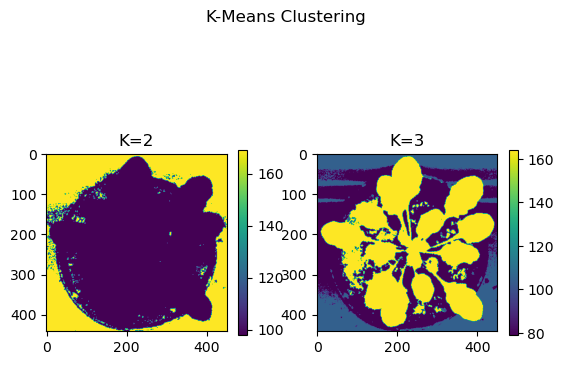

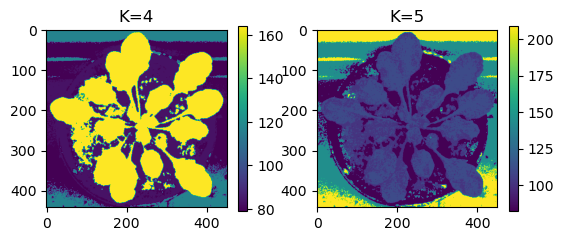

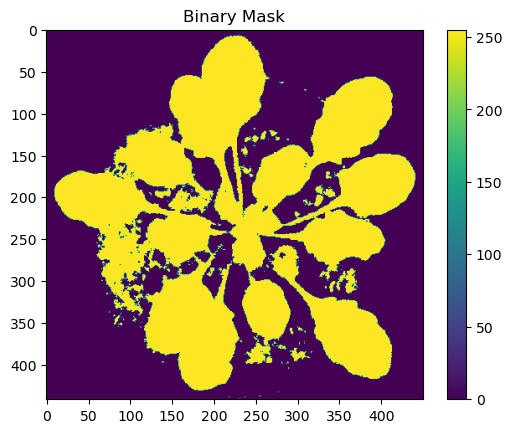

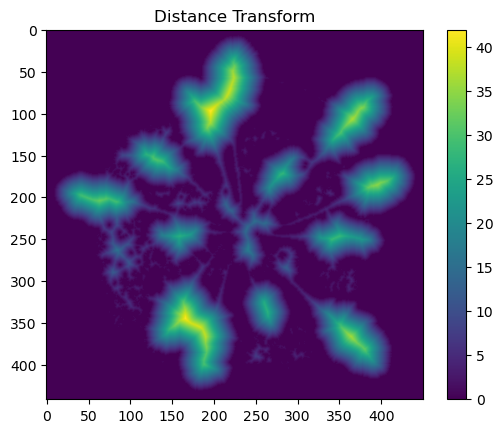

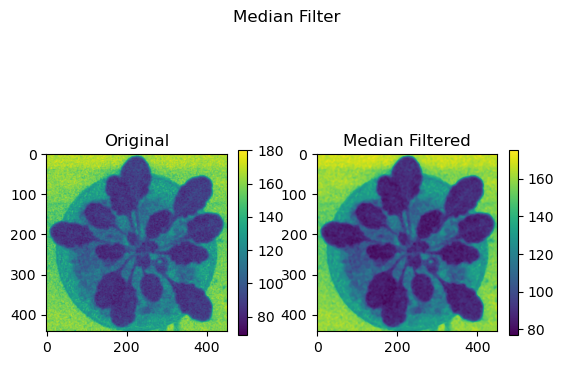

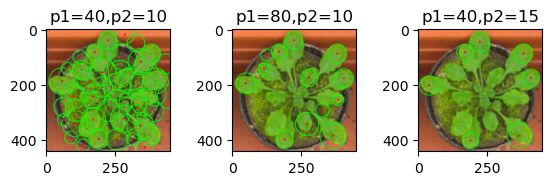

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

input = cv2.imread("ara2012_plant102_rgb.png")
inputt2=input.copy()
inputt3=input.copy()

inputEl1=input.copy()
inputEl2=input.copy()
inputEl3=input.copy()

inputReshape = input.reshape((-1, 3))
input2 = np.float32(inputReshape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 2
attempts = 10
_, labels, center = cv2.kmeans(input2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[labels.flatten()]
result1 = res.reshape((input.shape))

k = 3
_, labels, center = cv2.kmeans(input2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[labels.flatten()]
result2 = res.reshape((input.shape))

k = 4
_, labels, center = cv2.kmeans(input2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[labels.flatten()]
result3 = res.reshape((input.shape))

k = 5
_, labels, center = cv2.kmeans(input2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[labels.flatten()]
result4 = res.reshape((input.shape))

result1_red, result1_green, result1_blue = cv2.split(result1)
result2_red, result2_green, result2_blue = cv2.split(result2)
result3_red, result3_green, result3_blue = cv2.split(result3)
result4_red, result4_green, result4_blue = cv2.split(result4)

fig, (ax1, ax2)= plt.subplots(1, 2)
fig.suptitle('K-Means Clustering')
im1=ax1.imshow(result1_blue)
colorbar1=fig.colorbar(im1, ax=ax1, shrink=0.5)
ax1.set_title('K=2')
im2=ax2.imshow(result2_green)
colorbar2=fig.colorbar(im2, ax=ax2, shrink=0.5)
ax2.set_title('K=3')
fig, (ax3, ax4)= plt.subplots(1, 2)
im3=ax3.imshow(result3_green)
colorbar3=fig.colorbar(im3, ax=ax3, shrink=0.5)
ax3.set_title('K=4')
im4=ax4.imshow(result4_blue)
colorbar4=fig.colorbar(im4, ax=ax4, shrink=0.5)
ax4.set_title('K=5')
plt.show()

binaryResult=result3
greenResult = binaryResult[:,:,1]
_, binaryMask=cv2.threshold(greenResult, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(binaryMask)
plt.colorbar()
plt.title('Binary Mask')
plt.show()

distanceTransform=cv2.distanceTransform(binaryMask, cv2.DIST_L2, 3)

plt.imshow(distanceTransform)
plt.colorbar()
plt.title('Distance Transform') 
plt.show()

labImg=cv2.cvtColor(input, cv2.COLOR_BGR2LAB)
lChannel, aChannel, bChannel=cv2.split(labImg)

medianFilter=cv2.medianBlur(aChannel, 5)
medianFilter2=medianFilter.copy()
medianFilter3=medianFilter.copy()

fig, (ax1, ax2)= plt.subplots(1, 2)
fig.suptitle('Median Filter')
im1=ax1.imshow(aChannel)
colorbar1=fig.colorbar(im1, ax=ax1, shrink=0.5)
ax1.set_title('Original')
im2=ax2.imshow(medianFilter)
colorbar2=fig.colorbar(im2, ax=ax2, shrink=0.5)
ax2.set_title('Median Filtered')
plt.show()

circles1=cv2.HoughCircles(medianFilter, cv2.HOUGH_GRADIENT, 1, 0.1*min(input.shape[:2]), param1=40, param2=10, minRadius=20, maxRadius=50)
circles1=np.uint16(np.around(circles1))

for circle in circles1[0, :]:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(input, center, radius, (0, 255, 0), 2)
    cv2.circle(input, center, 2, (0, 0, 255), 3)

input=cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

circles2=cv2.HoughCircles(medianFilter2, cv2.HOUGH_GRADIENT, 1, 0.1*min(input.shape[:2]), param1=80, param2=10, minRadius=20, maxRadius=50)
circles2=np.uint16(np.around(circles2))

for circle in circles2[0, :]:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(inputt2, center, radius, (0, 255, 0), 2)
    cv2.circle(inputt2, center, 2, (0, 0, 255), 3)

inputt2=cv2.cvtColor(inputt2, cv2.COLOR_BGR2RGB)

circles3=cv2.HoughCircles(medianFilter3, cv2.HOUGH_GRADIENT, 1, 0.1*min(input.shape[:2]), param1=80, param2=15, minRadius=20, maxRadius=50)
circles3=np.uint16(np.around(circles3))

for circle in circles3[0, :]:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(inputt3, center, radius, (0, 255, 0), 2)
    cv2.circle(inputt3, center, 2, (0, 0, 255), 3)

inputt3=cv2.cvtColor(inputt3, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2, ax3)= plt.subplots(1, 3)

im1=ax1.imshow(input)
ax1.set_title('p1=40,p2=10')

im2=ax2.imshow(inputt2)
ax2.set_title('p1=80,p2=10')

im3=ax3.imshow(inputt3)
ax3.set_title('p1=40,p2=15')

plt.subplots_adjust(wspace=0.5)

plt.show()


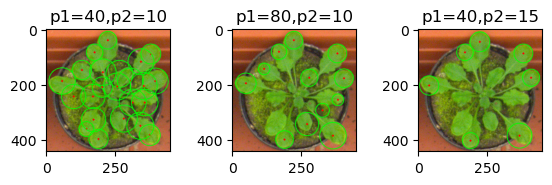

In [2]:
vCircles1=[]
vCircles2=[]
vCircles3=[]

for circle in circles1[0]:
    x=circle[0]
    y=circle[1]
    if binaryMask[y, x]==255:
        vCircles1.append(circle)

for circle in circles2[0]:
    x=circle[0]
    y=circle[1]
    if binaryMask[y, x]==255:
        vCircles2.append(circle)

for circle in circles3[0]:
    x=circle[0]
    y=circle[1]
    if binaryMask[y, x]==255:
        vCircles3.append(circle)

for circle in vCircles1:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(inputEl1, center, radius, (0, 255, 0), 2)
    cv2.circle(inputEl1, center, 2, (0, 0, 255), 3)

for circle in vCircles2:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(inputEl2, center, radius, (0, 255, 0), 2)
    cv2.circle(inputEl2, center, 2, (0, 0, 255), 3)

for circle in vCircles3:
    center=(circle[0], circle[1])
    radius=circle[2]
    cv2.circle(inputEl3, center, radius, (0, 255, 0), 2)
    cv2.circle(inputEl3, center, 2, (0, 0, 255), 3)

inputEl1=cv2.cvtColor(inputEl1, cv2.COLOR_BGR2RGB)
inputEl2=cv2.cvtColor(inputEl2, cv2.COLOR_BGR2RGB)
inputEl3=cv2.cvtColor(inputEl3, cv2.COLOR_BGR2RGB)

fig,(ax1, ax2, ax3)=plt.subplots(1, 3)

im1=ax1.imshow(inputEl1)
ax1.set_title('p1=40,p2=10')

im2=ax2.imshow(inputEl2)
ax2.set_title('p1=80,p2=10')

im3=ax3.imshow(inputEl3)
ax3.set_title('p1=40,p2=15')

plt.subplots_adjust(wspace=0.5)
plt.show()